# Predicting Toronto’s Airbnb Listing Prices

## Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [6]:
#Importing the dataset:
listings_raw= pd.read_csv(r'C:\Users\user\Desktop\Ryerson University\Projects\My Project CIND820\Public Data\listings_Toronto_Dec_5.csv')

In [7]:
print(f"The dataset contains {len(listings_raw)} Airbnb listings")

The dataset contains 15261 Airbnb listings


In [8]:
pd.set_option('display.max_columns', len(listings_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 200)
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20211205213140,2021-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire residential home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",$469.00,28,730,28.0,28.0,730.0,730.0,28.0,730.0,NaN,t,0,0,0,0,2021-12-06,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20211205213140,2021-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",$96.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,30,60,90,365,2021-12-06,169,0,0,2012-09-05,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.50
2,23691,https://www.airbnb.com/rooms/23691,20211205213140,2021-12-06,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in residential home,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",$72.00,28,28,28.0,28.0,28.0,28.0,28.0,28.0,NaN,t,30,60,90,365,2021-12-06,217,0,0,2011-08-22,2018-10-10,4.75,4.7

In [9]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15261 non-null  int64  
 1   listing_url                                   15261 non-null  object 
 2   scrape_id                                     15261 non-null  int64  
 3   last_scraped                                  15261 non-null  object 
 4   name                                          15260 non-null  object 
 5   description                                   14810 non-null  object 
 6   neighborhood_overview                         9239 non-null   object 
 7   picture_url                                   15261 non-null  object 
 8   host_id                                       15261 non-null  int64  
 9   host_url                                      15261 non-null 

In [10]:
listings_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15261.0,3.090755e+07,1.561377e+07,1.419000e+03,1.836737e+07,3.249823e+07,4.450433e+07,5.368448e+07
scrape_id,15261.0,2.021121e+13,2.894626e+00,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13
host_id,15261.0,1.249332e+08,1.216209e+08,1.565000e+03,2.262621e+07,7.992063e+07,2.093466e+08,4.344476e+08
host_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
host_total_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,15261.0,4.368202e+01,4.904007e-02,4.358649e+01,4.364560e+01,4.366329e+01,4.370399e+01,4.383526e+01
longitude,15261.0,-7.939652e+01,6.582377e-02,-7.962120e+01,-7.942598e+01,-7.939653e+01,-7.937570e+01,-7.912801e+01
accommodates,15261.0,3.055960e+00,2.006350e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Pre-processing, Data Cleaning and Feature Engineering

In [11]:
    #Dropping initial columns
        # As I am not using Natural Language Processing in creating the model, all free text columns will be dropped
        # Columns assumed to be irrelevant to price(e.g. url, host name and some host-related features that are unrelated to the property).
        # Columns with more than 30% missing data

In [12]:
listings_raw.drop(['listing_url','scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url', 'host_id', 'host_url', 'host_name','host_since' ,'host_location', 'host_about', 'host_response_time', 'host_response_rate','host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count', 'host_verifications','neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60','availability_90','calendar_last_scraped','first_review','last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month' ], axis=1, inplace=True)
listings_raw.set_index('id', inplace=True) # ID as index

In [13]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15250 non-null  object 
 1   host_total_listings_count    15250 non-null  float64
 2   host_has_profile_pic         15250 non-null  object 
 3   host_identity_verified       15250 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15248 non-null  object 
 11  bedrooms                     14134 non-null  float64
 12  beds                         14523 non-null  float64
 13  amenities 

In [14]:
    # Cleaning individual columns

In [15]:
        # checking for missing data

In [16]:
listings_raw.isna().sum() 

host_is_superhost                11
host_total_listings_count        11
host_has_profile_pic             11
host_identity_verified           11
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   13
bedrooms                       1127
beds                            738
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3486
review_scores_accuracy         3653
review_scores_cleanliness      3651
review_scores_checkin          3654
review_scores_communication    3654
review_scores_location      

sns.heatmap(listings_raw.isna())

In [17]:
# Filling miising values with 'mean' for the numerical data

for col in ['review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating']:
    listings_raw[col].fillna(listings_raw[col].mean(), inplace=True)

In [18]:
#for col in listings_raw[ 'bathrooms_text','host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'].fillna(listings_raw[col].mode()[0], inplace=True)
#for col in listings_raw['bathrooms_text', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identify_verefied'

# Filling missing values with mode
listings_raw[col].fillna(listings_raw[col].mode()[0],inplace=True)

In [19]:
listings_raw['bathrooms_text'].fillna(listings_raw['bathrooms_text'].mode()[0], inplace=True)
listings_raw['host_is_superhost'].fillna(listings_raw['host_is_superhost'].mode()[0], inplace=True)
listings_raw['host_total_listings_count'].fillna(listings_raw['host_total_listings_count'].mode()[0], inplace=True)
listings_raw['host_has_profile_pic'].fillna(listings_raw['host_has_profile_pic'].mode()[0], inplace=True)
listings_raw['host_identity_verified'].fillna(listings_raw['host_identity_verified'].mode()[0], inplace=True)

In [20]:
for col in ['beds','bedrooms']:
    listings_raw[col].fillna(listings_raw[col].median(), inplace=True)

In [21]:
listings_raw.isna().sum()

host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int

In [22]:
        # Converting categorical Features:

In [23]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15261 non-null  object 
 1   host_total_listings_count    15261 non-null  float64
 2   host_has_profile_pic         15261 non-null  object 
 3   host_identity_verified       15261 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15261 non-null  object 
 11  bedrooms                     15261 non-null  float64
 12  beds                         15261 non-null  float64
 13  amenities 

In [24]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire residential home,Entire home/apt,10,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",$469.00,28,730,t,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,f
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",$96.00,180,365,t,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,t
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",$72.00,28,28,t,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,t
27423,f,1.0,t,t,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Dryer"", ...",$45.00,365,365,t,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,f
30931,f,2.0,t,f,Waterfront Communities-The Island,43.64015,-79.37625,Entire rental unit,Entire home/apt,2,1.5 baths,1.0,2.0,"[""Heating"", ""Pool"", ""Kitchen"", ""Air conditioni...",$128.00,180,365,t,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,f


In [25]:
listings_raw.bathrooms_text.unique()

array(['3 baths', '1.5 baths', '1 shared bath', '1 bath', '2 baths',
       '1 private bath', '1.5 shared baths', '4 baths', '2.5 baths',
       '5 baths', '2 shared baths', '0 baths', '3.5 baths',
       '3 shared baths', '4.5 baths', '3.5 shared baths', '5.5 baths',
       '0 shared baths', '6 baths', 'Shared half-bath', 'Half-bath',
       '2.5 shared baths', 'Private half-bath', '4 shared baths',
       '4.5 shared baths', '6.5 baths', '7.5 baths'], dtype=object)

In [26]:
listings_raw[["bathrooms_text"]].head()

,bathrooms_text
id,
1419,3 baths
8077,1.5 baths
23691,1 shared bath
27423,1 bath
30931,1.5 baths


In [27]:
# I prefer to have separate columns for the number of bathrooms and the type of bathroom.
listings_raw["bathroom_qty"] = listings_raw["bathrooms_text"].str.split(" ", expand=True)[0]
listings_raw["bathroom_type"] = listings_raw["bathrooms_text"].str.split(" ", expand=True)[1]

In [28]:
listings_raw[["bathrooms_text","bathroom_qty","bathroom_type"]].head()

,bathrooms_text,bathroom_qty,bathroom_type
id,,,
1419,3 baths,3,baths
8077,1.5 baths,1.5,baths
23691,1 shared bath,1,shared
27423,1 bath,1,bath
30931,1.5 baths,1.5,baths


In [29]:
listings_raw['bathroom_qty'].value_counts()

1            11461
2             2052
1.5            992
2.5            261
3              224
3.5             99
0               47
4.5             39
4               38
Shared          12
Half-bath        9
5                9
5.5              7
6                5
Private          3
6.5              2
7.5              1
Name: bathroom_qty, dtype: int64

In [30]:
# Replcae the the incorrect values "Shared", "Half-bath" & "Private" with mean value "1"
listings_raw['bathroom_qty'].replace(['Shared','Half-bath','Private'],['1','1','1'],inplace=True)

In [31]:
listings_raw.bathroom_qty.unique()

array(['3', '1.5', '1', '2', '4', '2.5', '5', '0', '3.5', '4.5', '5.5',
       '6', '6.5', '7.5'], dtype=object)

In [32]:
listings_raw['bathroom_type'].value_counts()

bath         7822
shared       3110
baths        3019
private      1286
half-bath      15
Name: bathroom_type, dtype: int64

In [33]:
# Combine bath types in two groups "private" & "shared"
listings_raw.bathroom_type.replace({
    'bath': 'private',
    'baths': 'private',
    'half-bath': 'private'

    }, inplace=True)


In [34]:
listings_raw['bathroom_type'].value_counts()

private    12142
shared      3110
Name: bathroom_type, dtype: int64

In [35]:
# Dropping the original 'bathrooms_text' feature
listings_raw.drop(['bathrooms_text' ], axis=1, inplace=True)

In [36]:
listings_raw.isna().sum()

host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
bathroom_qty                   0
bathroom_t

In [37]:
listings_raw['bathroom_type'].fillna(listings_raw['bathroom_type'].mode()[0], inplace=True)

In [38]:
listings_raw.property_type.value_counts()

Entire condominium (condo)             3697
Entire rental unit                     3085
Private room in residential home       2308
Entire residential home                1734
Private room in rental unit             962
Entire guest suite                      683
Private room in condominium (condo)     591
Private room in townhouse               387
Private room in bungalow                300
Entire townhouse                        273
Entire loft                             249
Entire bungalow                         180
Private room in guest suite             130
Private room in villa                    87
Shared room in rental unit               69
Shared room in residential home          58
Room in boutique hotel                   57
Entire guesthouse                        52
Private room in guesthouse               44
Entire serviced apartment                43
Private room in bed and breakfast        38
Room in hotel                            32
Private room in loft            

In [39]:
# Property types column needs to be cleaned, there is a large number of categories with few listings. The categories 'Entire condominium (condo)', 'Entire rental unit', 'Private room in residential home' or 'Shared room' and 'Other' will be used, as main properties classifications.
listings_raw.property_type.replace({
    'Entire residential home': 'Entire rental unit',
    'Private room in rental unit': 'Private room in residential home',
    'Entire guest suite': 'Entire rental unit',
    'Private room in condominium (condo)':'Private room in residential home',
    'Private room in townhouse':'Private room in residential home',
    'Private room in bungalow':'Private room in residential home',
    'Entire townhouse':'Entire rental unit',
    'Entire loft':'Entire rental unit',
    'Entire bungalow':'Entire rental unit',
    'Private room in guest suite':'Private room in residential home',
    'Private room in villa':'Private room in residential home',
    'Shared room in rental unit':'Shared room',
    'Shared room in residential home':'Shared room',
    'Room in boutique hotel':'Private room in residential home',
    'Entire guesthouse':'Entire rental unit',
    'Private room in guesthouse':'Private room in residential home',
    'Entire serviced apartment':'Entire condominium (condo)',
    'Shared room in townhouse':'Shared room',
    'Shared room in condominium (condo)':'Shared room'
    }, inplace=True)

# Replacing remaining categories with 'other'
listings_raw.loc[~listings_raw.property_type.isin(['Entire condominium (condo)' , 'Entire rental unit', 'Private room in residential home' , 'Shared room']), 'property_type'] = 'Other'

In [40]:
listings_raw.property_type.value_counts()

Entire rental unit                  6256
Private room in residential home    4866
Entire condominium (condo)          3740
Other                                233
Shared room                          166
Name: property_type, dtype: int64

In [41]:
listings_raw.room_type.value_counts()

Entire home/apt    10057
Private room        4995
Shared room          189
Hotel room            20
Name: room_type, dtype: int64

In [42]:
# Normalize price column by deleting the $ sign and convert to numeric
import locale
locale.setlocale(locale.LC_ALL,'')
listings_raw['price']=listings_raw.price.map(lambda x: locale.atof(x.strip('$')))

In [43]:
listings_raw.head(3)

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom_qty,bathroom_type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire rental unit,Entire home/apt,10,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",469.0,28,730,t,0,7,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,3,private
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in residential home,Private room,2,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",96.0,180,365,t,365,169,0,0,4.84,4.81,4.89,4.87,4.90,4.92,4.83,t,1.5,private
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",72.0,28,28,t,365,217,0,0,4.75,4.73,4.82,4.90,4.93,4.34,4.73,t,1,shared


In [44]:
# Example of amenities listed
listings_raw.amenities[:1].values

array(['["Heating", "Shampoo", "First aid kit", "Fire extinguisher", "Dryer", "TV", "Kitchen", "Air conditioning", "Essentials", "Wifi", "Indoor fireplace", "Long term stays allowed", "Washer", "Smoke alarm"]'],
      dtype=object)

In [45]:
# Creating a set of all possible amenities and most probably with high importnace as per the market:
amenities_list = list(listings_raw.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Samsung  stainless steel oven] [Heating',
 'Private sauna',
 'and 5-10 years old',
 'Iron] [Keypad',
 'Security cameras on property] [Hot water',
 'bar fridge below counter and full-size fridge in common area for your use.  refrigerator',
 'L\\u2019Or\\u00e9al Hair Conditioner   conditioner',
 'No name  conditioner',
 'GE refrigerator',
 'LG  Bluetooth sound system',
 'Yamaha sound system with aux',
 'Dedicated workspace: desk] [Private entrance',
 'Paid parking off premises] [Lock on bedroom door',
 'Dedicated workspace] [Washer',
 'Fast wifi \\u2013 558 Mbps',
 'Fast wifi \\u2013 73 Mbps',
 'FRIGIDAIRE refrigerator',
 'Bose sound system with Bluetooth and aux',
 'Free residential garage on premises \\u2013 2 spaces',
 'Frigidaire  oven',
 'Lock on bedroom door',
 'Shower gel] [Pool',
 'Trash compactor] [Shampoo',
 'Costco conditioner',
 'Paid parking lot on premises \\u2013 4 spaces',
 'Paid dryer \\u2013 In building',
 '33\\ HDTV with Chromecast',
 'Paid dryer] [Free washer \\u201

In [46]:
listings_raw.loc[listings_raw['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('TV'), 'tv'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('parking'), 'parking'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [47]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings_raw.iloc[:,31:].columns
listings_raw[cols_to_replace_nulls] = listings_raw[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings_raw.iloc[:,31:].columns:
    if listings_raw[col].sum() < len(listings_raw)/20:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings_raw.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings_raw.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'high_end_electronics', 'child_friendly', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [48]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom_qty,bathroom_type,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire rental unit,Entire home/apt,10,5.0,7.0,469.0,28,730,t,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,f,3,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in residential home,Private room,2,1.0,1.0,96.0,180,365,t,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,t,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1.0,1.0,72.0,28,28,t,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,t,1,shared,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
27423,f,1.0,t,t,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,1.0,45.0,365,365,t,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,f,1,private,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
30931,f,2.0,t,f,Waterfront Communities-The Island,43.64015,-79.37625,Entire rental unit,Entire home/apt,2,1.0,2.0,128.0,180,365,t,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,f,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [49]:
listings_raw.neighbourhood_cleansed.value_counts()

Waterfront Communities-The Island      2719
Niagara                                 597
Annex                                   500
Church-Yonge Corridor                   484
Bay Street Corridor                     440
Trinity-Bellwoods                       417
Dovercourt-Wallace Emerson-Junction     383
Kensington-Chinatown                    381
Moss Park                               354
Willowdale East                         347
South Riverdale                         302
Little Portugal                         294
Palmerston-Little Italy                 264
South Parkdale                          237
Mimico (includes Humber Bay Shores)     178
Mount Pleasant West                     171
Roncesvalles                            165
Cabbagetown-South St.James Town         161
Dufferin Grove                          154
University                              154
York University Heights                 154
North St.James Town                     147
Islington-City Centre West      

In [50]:
listings_raw['host_identity_verified'].value_counts()

t    12828
f     2433
Name: host_identity_verified, dtype: int64

In [51]:
listings_raw['host_has_profile_pic'].value_counts()

t    15194
f       67
Name: host_has_profile_pic, dtype: int64

In [52]:
# Replacing columns with f/t with 0/1
listings_raw.replace({'f': 0, 't': 1}, inplace=True)

In [53]:
# Plots a simple bar chart of the total count for each category in the column specified
def category_count_plot(col, figsize=(8,4)):
    plt.figure(figsize=figsize)
    listings_raw[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

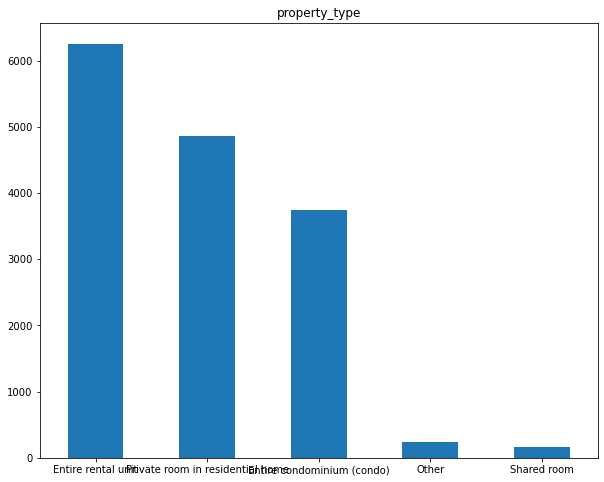

Entire rental unit                  0.409934
Private room in residential home    0.318852
Entire condominium (condo)          0.245069
Other                               0.015268
Shared room                         0.010877
Name: property_type, dtype: float64


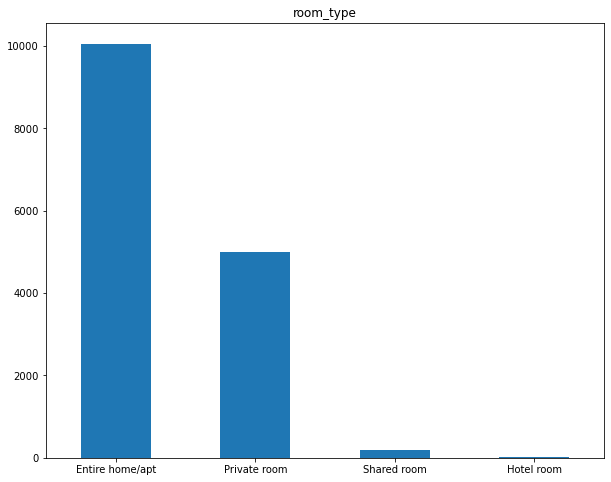

Entire home/apt    0.659000
Private room       0.327305
Shared room        0.012385
Hotel room         0.001311
Name: room_type, dtype: float64


In [54]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(10,8))
    print(listings_raw[col].value_counts(normalize=True))

In [55]:
listings_raw = pd.get_dummies(data= listings_raw, columns=['neighbourhood_cleansed','property_type', 'room_type'],drop_first=True)

In [56]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom_qty,bathroom_type,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,...,neighbourhood_cleansed_South Riverdale,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,0,1.0,1,1,43.64590,-79.42423,10,5.0,7.0,469.0,28,730,1,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,0,3,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8077,0,2.0,1,0,43.64080,-79.37673,2,1.0,1.0,96.0,180,365,1,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,1,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
23691,0,2.0,1,1,43.69805,-79.45411,3,1.0,1.0,72.0,28,28,1,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,1,1,shared,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
27423,0,1.0,1,1,43.66884,-79.32725,1,1.0,1.0,45.0,365,365,1,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,0,1,private,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
30931,0,2.0,1,0,43.64015,-79.37625,2,1.0,2.0,128.0,180,365,1,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,0,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [57]:
listings_raw.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,15261.0,0.3,0.4,0.0,0.0,0.0,1.0,1.0
host_total_listings_count,15261.0,6.2,21.2,0.0,1.0,1.0,4.0,272.0
host_has_profile_pic,15261.0,1.0,0.1,0.0,1.0,1.0,1.0,1.0
host_identity_verified,15261.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
latitude,15261.0,43.7,0.0,43.6,43.6,43.7,43.7,43.8
longitude,15261.0,-79.4,0.1,-79.6,-79.4,-79.4,-79.4,-79.1
accommodates,15261.0,3.1,2.0,0.0,2.0,2.0,4.0,16.0
bedrooms,15261.0,1.4,0.8,1.0,1.0,1.0,2.0,9.0
beds,15261.0,1.7,1.1,1.0,1.0,1.0,2.0,18.0
price,15261.0,155.5,371.2,0.0,67.0,101.0,165.0,13000.0


# 2. Exploratory Data Analysis

In [58]:
listings_raw.describe().round(1)

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,...,neighbourhood_cleansed_South Riverdale,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,...,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0,15261.0
mean,0.3,6.2,1.0,0.8,43.7,-79.4,3.1,1.4,1.7,155.5,26.3,66225.2,1.0,131.5,26.2,4.2,0.5,4.6,4.8,4.7,4.8,4.8,4.8,4.7,0.3,0.9,0.1,0.2,0.1,0.5,0.1,0.7,0.5,0.6,0.8,0.3,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.3,0.0,0.0,0.3,0.0
std,0.4,21.2,0.1,0.4,0.0,0.1,2.0,0.8,1.1,371.2,40.2,8094838.7,0.2,135.0,53.5,11.2,1.5,0.6,0.4,0.5,0.4,0.4,0.3,0.4,0.4,0.3,0.3,0.4,0.3,0.5,0.2,0.4,0.5,0.5,0.4,0.5,0.4,...,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.2,0.1,0.0,0.4,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.5,0.1,0.0,0.5,0.1
min,0.0,0.0,0.0,0.0,43.6,-79.6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,1.0,1.0,43.6,-79.4,2.0,1.0,1.0,67.0,5.0,91.0,1.0,0.0,1.0,0.0,0.0,4.6,4.8,4.7,4.8,4.8,4.8,4.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,1.0,43.7,-79.4,2.0,1.0,1.0,101.0,28.0,1125.0,1.0,87.0,5.0,0.0,0.0,4.7,4.8,4.7,4.9,4.9,4.8,4.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,.

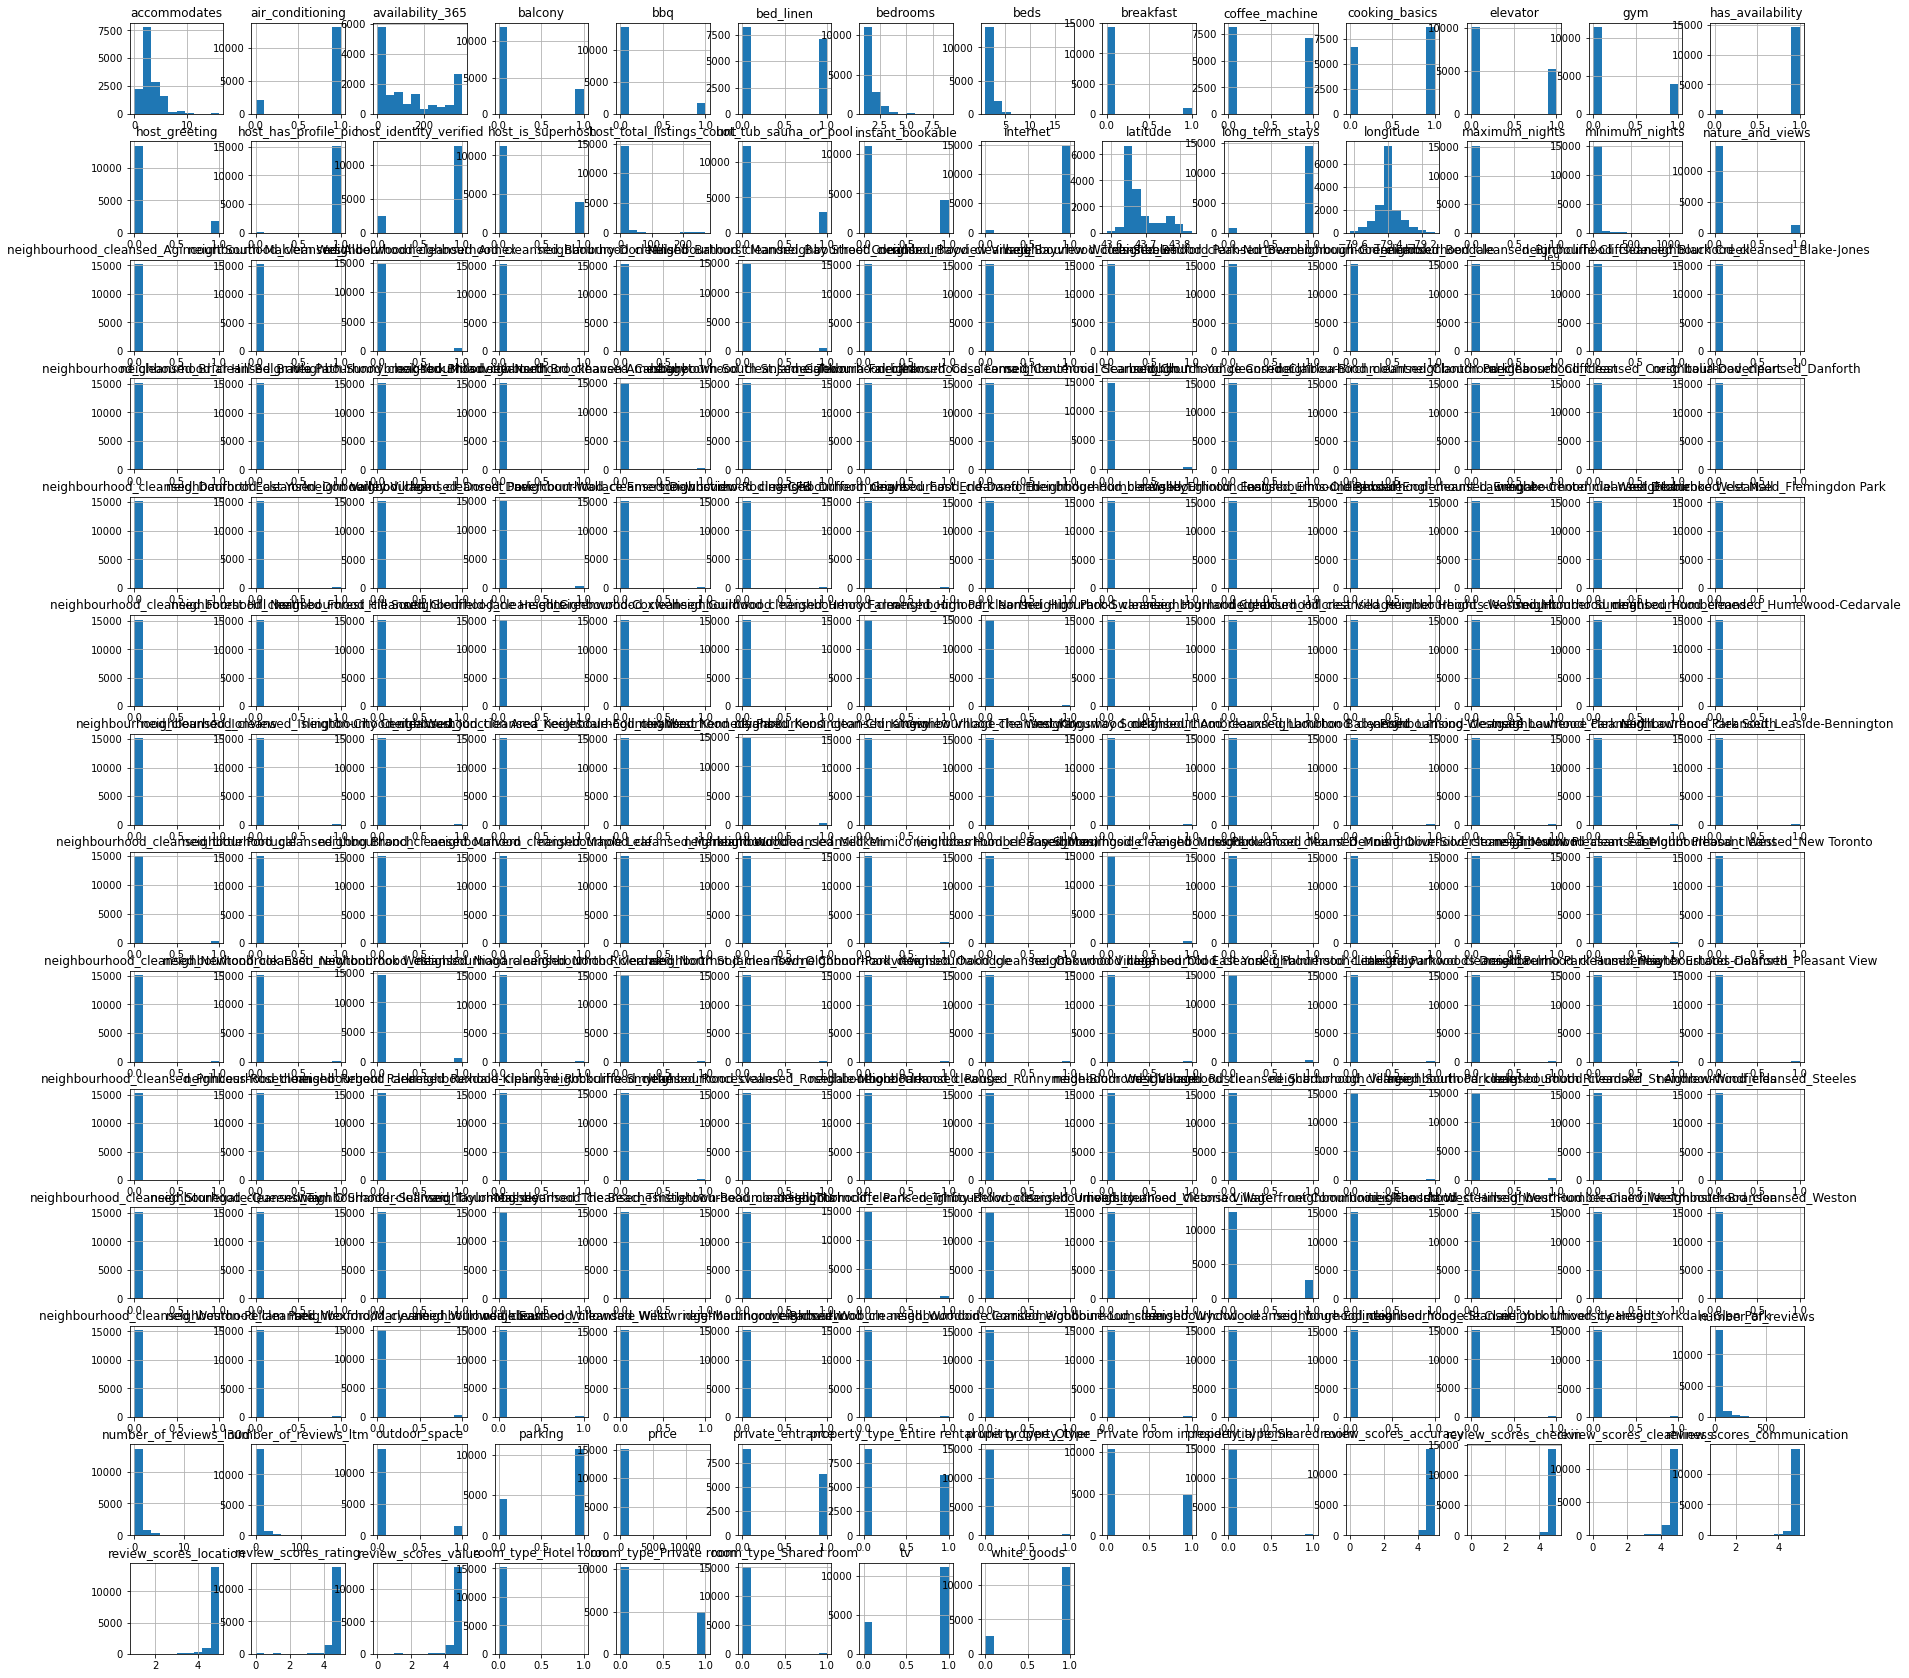

In [59]:
# Plotting the distribution of numerical and boolean categories
listings_raw.hist(figsize=(30,30));

In [60]:
vars = listings_raw.groupby(['bathroom_qty']).price.mean().sort_values(ascending=False)[:]
print(vars)

bathroom_qty
6      1986.000000
5       890.222222
4       877.842105
4.5     705.589744
6.5     671.500000
3.5     620.656566
5.5     605.285714
3       431.352679
2.5     279.272031
7.5     228.000000
2       210.686647
1.5     164.227823
0       134.723404
1       126.703439
Name: price, dtype: float64


In [61]:
listings_raw.drop('bathroom_qty', axis=1, inplace=True)

In [62]:
vans = listings_raw.groupby(['bathroom_type']).price.mean().sort_values(ascending=False)[:]
print(vans)

bathroom_type
private    174.439470
shared      81.264952
Name: price, dtype: float64


In [63]:
listings_raw = pd.get_dummies(data= listings_raw, columns=['bathroom_type'],drop_first=True)

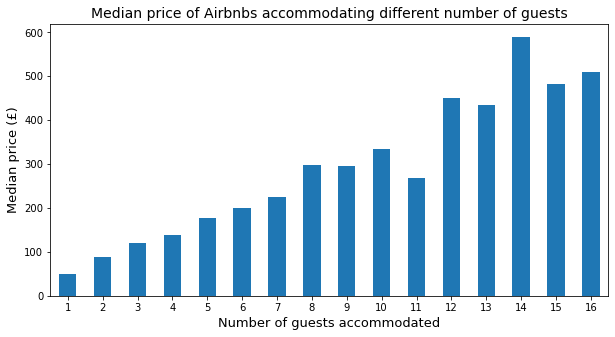

In [64]:
plt.figure(figsize=(10,5))
listings_raw.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

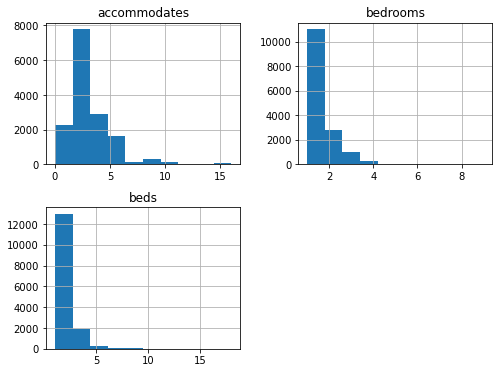

In [65]:
listings_raw[['accommodates','bedrooms', 'beds']].hist(figsize=(8,6));

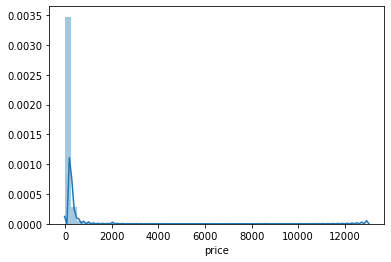

In [66]:
sns.distplot(listings_raw['price'])

In [67]:
print(f"Nightly advertised prices range from ${min(listings_raw.price)} to ${max(listings_raw.price)}.")

Nightly advertised prices range from $0.0 to $13000.0.


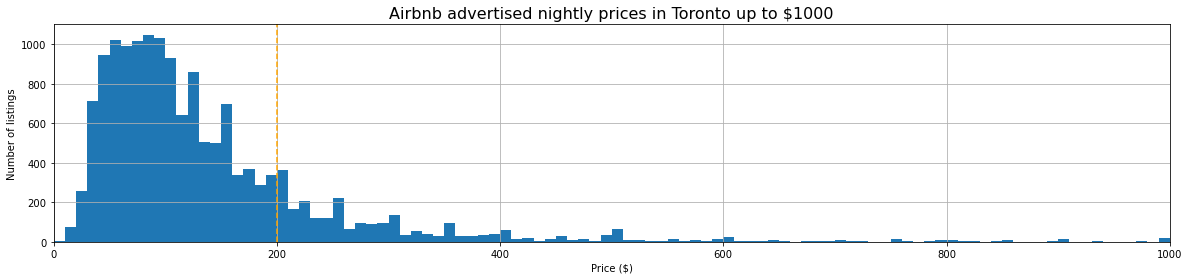

In [68]:
# Distribution of prices from $0 
plt.figure(figsize=(20,4))
listings_raw.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Toronto up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

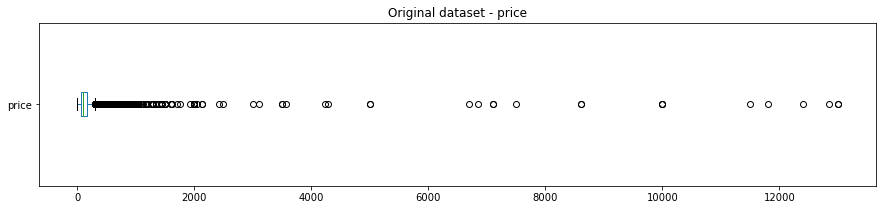

IQR price:  98.0
Upper limit:  312.0
Lower limit:  -80.0
983 Entries above upper limit
6.44% of dataset


In [69]:
# Displaying the box plot for price
fig, ax = plt.subplots(figsize=(15,3))
listings_raw['price'].plot(kind='box', vert=False)
ax.set_title('Original dataset - price')
plt.show()

# IQR rule for variable price
q1_price = listings_raw.price.quantile(q=0.25)
q3_price = listings_raw.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)


print("{} Entries above upper limit".format(len(listings_raw[listings_raw.price > sup_price])))
print("{:.2f}% of dataset".format((len(listings_raw[listings_raw.price > sup_price]) / listings_raw.shape[0])*100))

In [70]:
listings_raw = listings_raw[listings_raw.price < 600]

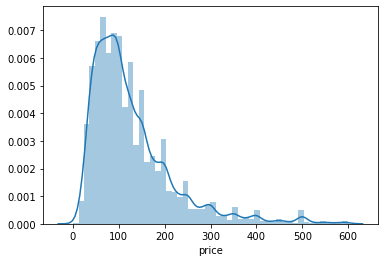

In [71]:
sns.distplot(listings_raw['price'])

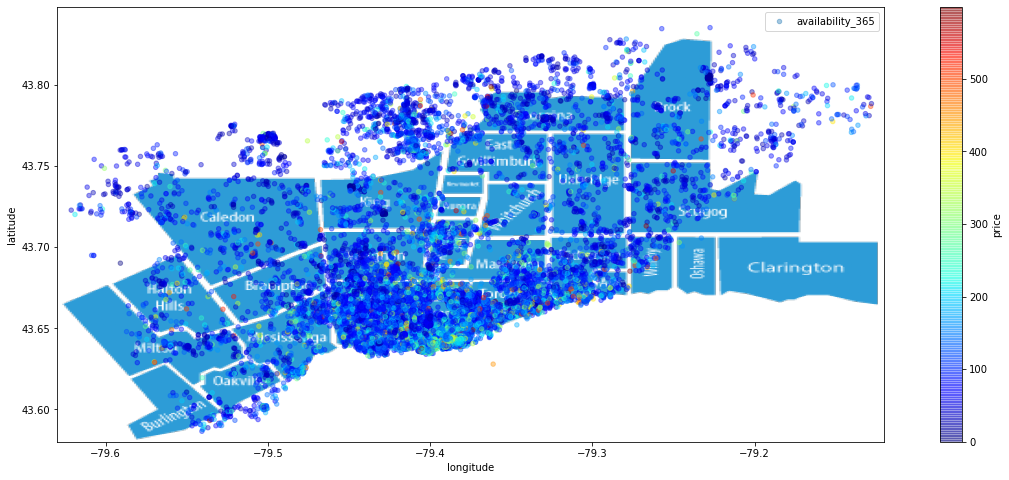

In [72]:
import urllib
plt.figure(figsize=(20,8))
i=urllib.request.urlopen('http://toronto.nustreamrealty.com/wp-content/uploads/gta-map-legend.png')
to_img=plt.imread(i)
plt.imshow(to_img,zorder=0,extent=[-79.63, -79.12, 43.58,43.83])
ax=plt.gca()
listings_raw.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()

In [73]:
# Calculating the average price by property types
var = listings_raw.groupby(['bedrooms']).price.mean().sort_values(ascending=False)[:]
print(var)

bedrooms
9.0    362.800000
8.0    315.000000
5.0    310.384615
4.0    298.637450
6.0    284.758621
7.0    278.666667
3.0    234.676221
2.0    173.487787
1.0    101.452488
Name: price, dtype: float64


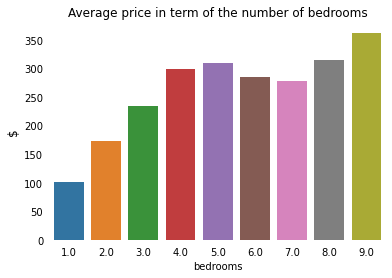

In [74]:
# Plotting the average price by type of property
ax = sns.barplot(var.index, var) 
ax.set_title('Average price in term of the number of bedrooms')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [75]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings_raw.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings_raw.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

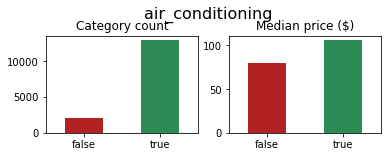

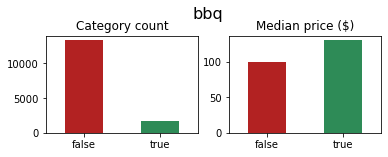

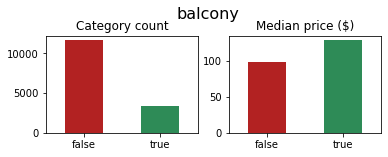

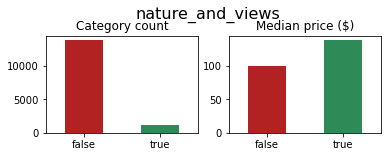

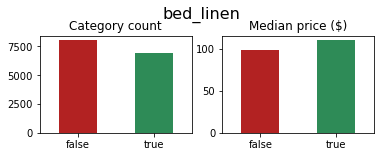

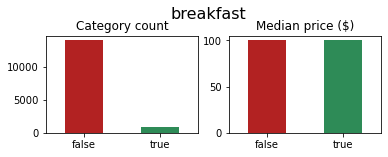

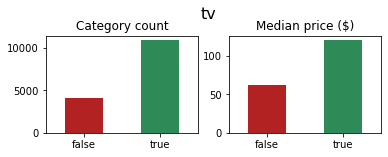

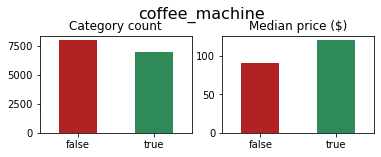

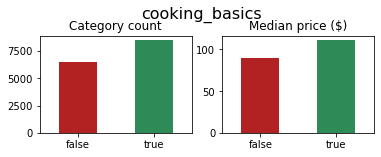

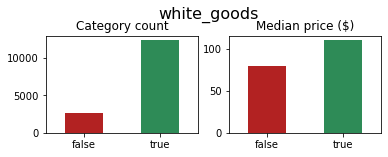

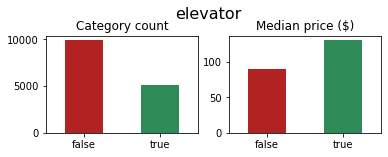

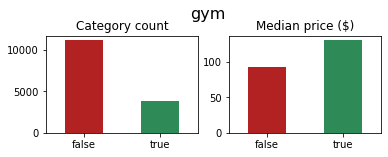

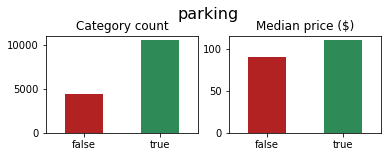

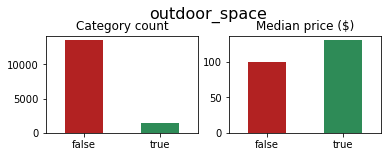

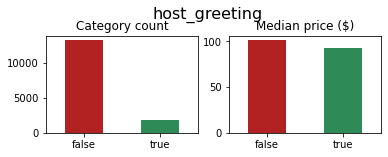

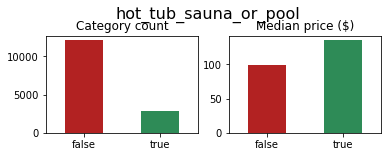

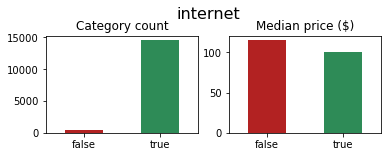

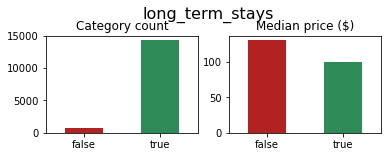

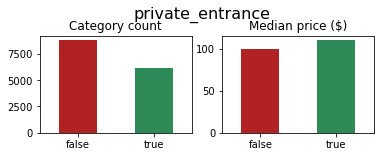

In [76]:
for col in listings_raw.iloc[:,25:44].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [77]:
def multi_collinearity_heatmap(listings_raw, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the listings.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = listings_raw.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

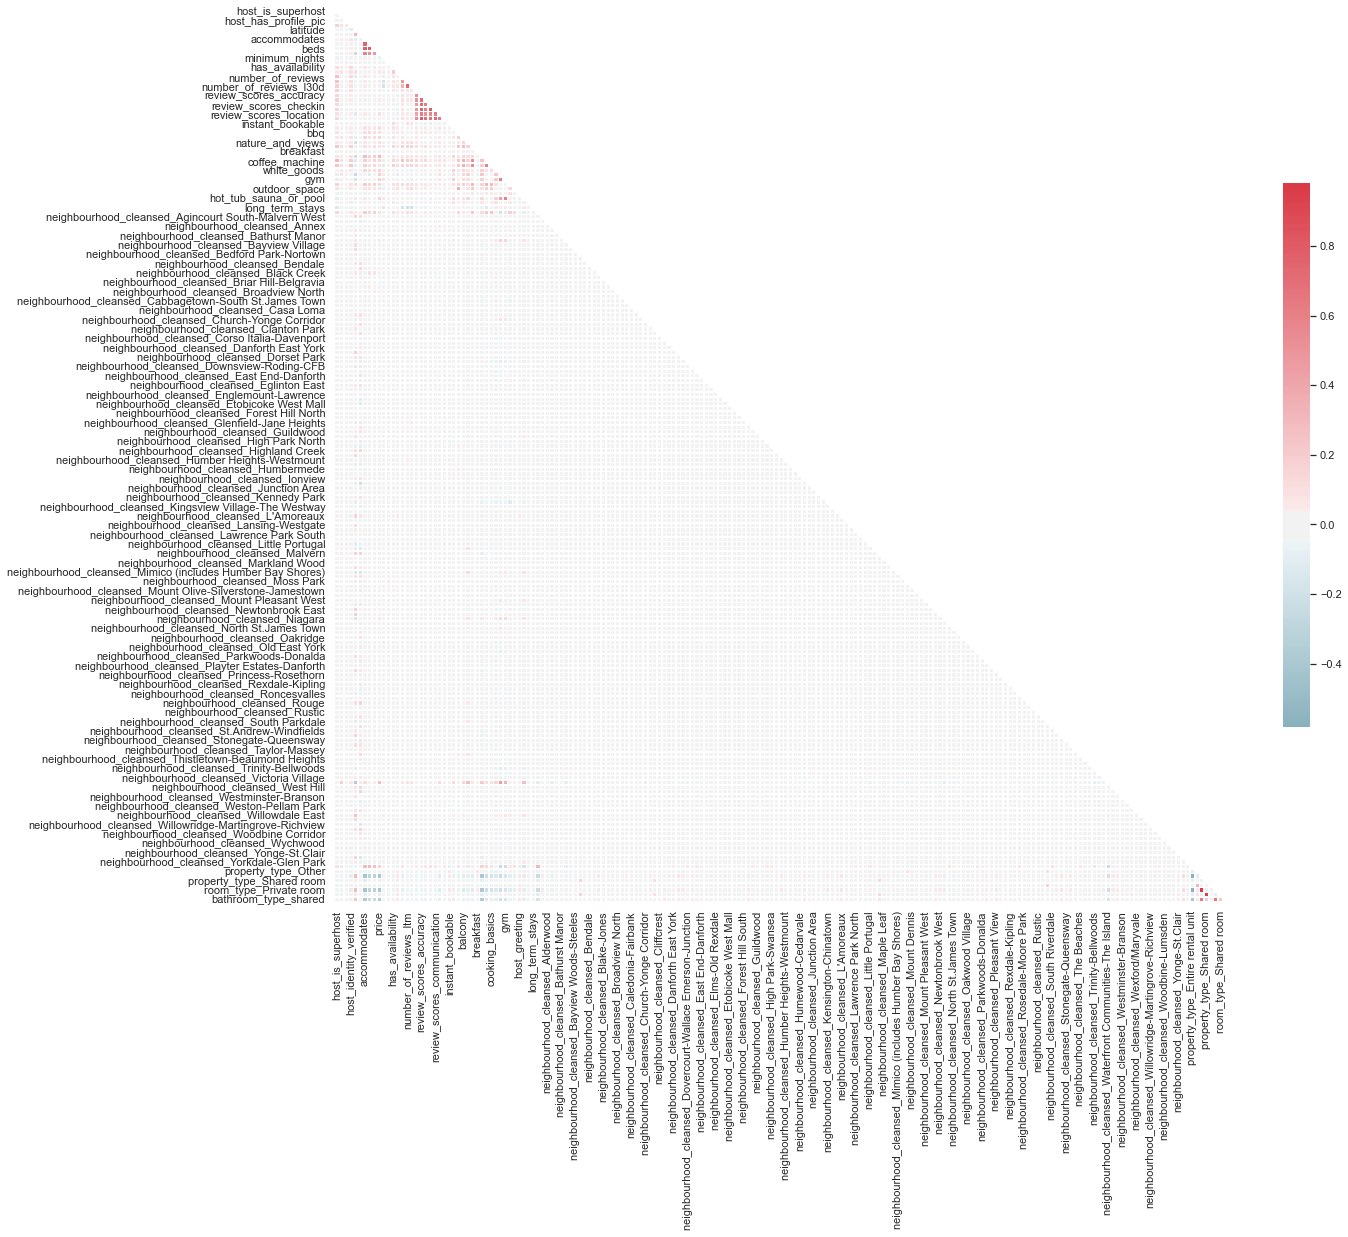

In [78]:
multi_collinearity_heatmap(listings_raw, figsize=(20,20))

In [79]:
# Dropping collinear features
to_drop = ['beds',
           'review_scores_location','review_scores_checkin','review_scores_cleanliness','review_scores_value']

listings_raw.drop(to_drop, axis=1, inplace=True)

# 3. Building Models

In [80]:
# Splitting the data to train and test sets
y = listings_raw['price']
X = listings_raw.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, listings_raw['price'], test_size=0.2, random_state=42)

   ## Model training and model selection

## 1.1: XGBoost

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [90]:
import time
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,2)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.11 minutes

Training MSE: 1457.3402
Validation MSE: 3868.6018

Training r2: 0.8203
Validation r2: 0.5408


In [83]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_cleansed_Keelesdale-Eglinton West,0.000000
neighbourhood_cleansed_Lambton Baby Point,0.000000
neighbourhood_cleansed_Long Branch,0.000000
neighbourhood_cleansed_East End-Danforth,0.000000
neighbourhood_cleansed_Mount Olive-Silverstone-Jamestown,0.000000
neighbourhood_cleansed_New Toronto,0.000000
neighbourhood_cleansed_Newtonbrook East,0.000000
neighbourhood_cleansed_Centennial Scarborough,0.000000
neighbourhood_cleansed_Glenfield-Jane Heights,0.000000
neighbourhood_cleansed_Kingsview Village-The Westway,0.000000


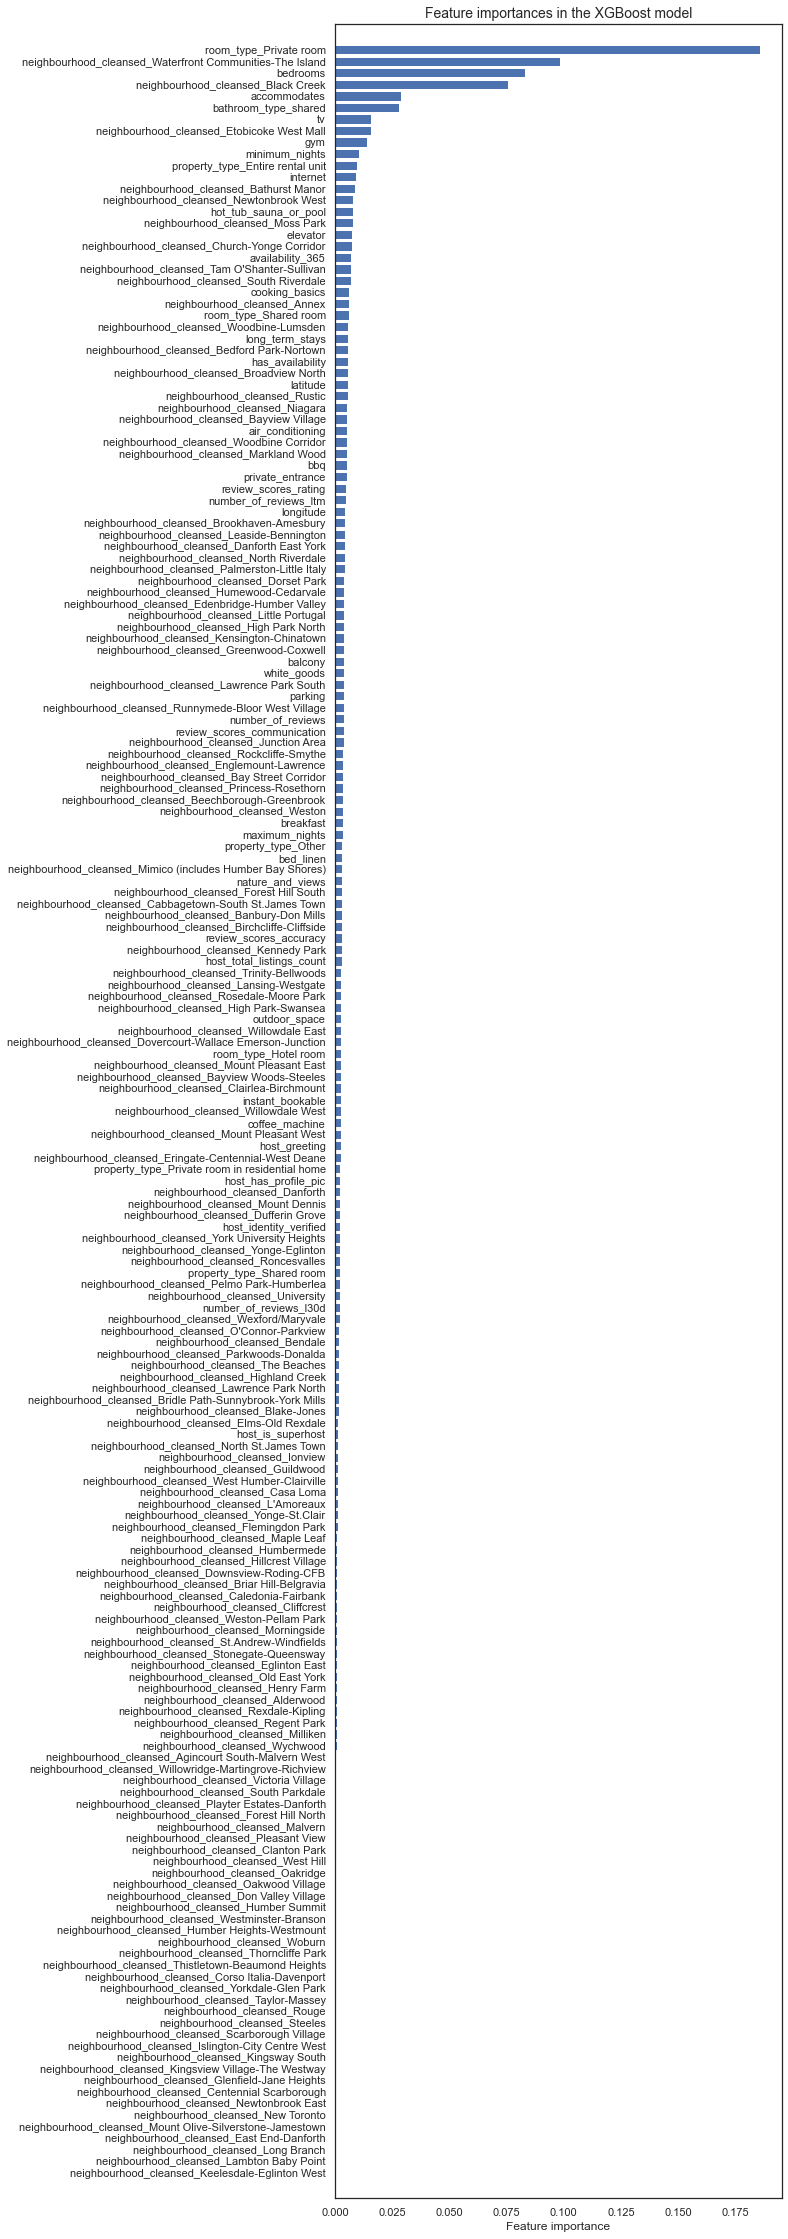

In [84]:
# Plotting feature importances
plt.figure(figsize=(8,40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()